In [7]:
# загрузка пакетов
import numpy as np
import random

In [8]:
#
import matplotlib.pyplot as plt
#
from scipy.interpolate import UnivariateSpline, CubicSpline
#
from pandas import DataFrame

[17.68487953 71.17839961 64.03614921 10.81804312 98.23707759 63.54469552
 96.66541574 83.53993038 75.95526088]


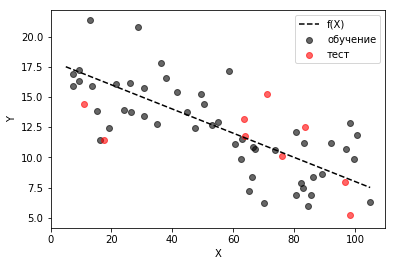

In [9]:
# -------Генерация исходных данных---------

# задаём ядро генератора случайных чисел (внимание: не глобально)
np.random.seed(10111)

# всего наблюдений, доля обучающей выборки
n_all, train_percent = 60, 0.85

# параметры распределения X
x_min, x_max = 5, 105

# генерируем X (uniform - равномерное распределение)
x = np.random.uniform(x_min, x_max, n_all)

# генерируем случайный шум
mu, sigma = 0, 2.5
res = np.random.normal(mu, sigma, n_all)

# отбираем наблюдения в обучающую выборку (без повторений значений)
in_train = np.random.choice(np.arange(n_all), int(n_all * train_percent),
                            replace=False)


# истинная функция взаимосвязи
## можно перенести вверх
def y_func(x):
    return (18 - 0.1 * x)


# для графика истинной взаимосвязи
# возвращает массив со всеми значениями х
x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

# фактические значения y (с шумом)
y = y_func(x) + res

# создаём векторы с данными для построения графиков
# наблюдения на обучающей выборке
x_train = x[in_train]
y_train = y[in_train]

# наблюдения на тестовой выборке
x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)
print(x_test)


#-----------------------------------------
#-------Графики---------

# график 1: исходные данные
#  обучающая выборка
plt.scatter(x_train, y_train, color='black', label='обучение', alpha=0.6)
#  тестовая выборка
plt.scatter(x_test, y_test, color='red', label='тест', alpha=0.6)
#  истинная функция взаимосвязи
plt.plot(x_line, y_line, color='black', linestyle='dashed', label='f(X)')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')

#  легенда
plt.legend()
plt.show()

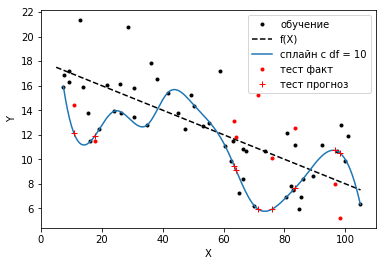

In [10]:
#-----------------------------------------
#-------Сплайн---------

# модель натурального сплайна с заданным количеством узлов (df)
my_df = 10

# равноотстоящие координаты по X
x_train_uni = np.linspace(min(x_train), max(x_train), num=my_df+2)
# находим узлы - ближайшие точки
knots_index = []
for u in x_train_uni:
    min_ind = np.argmin(abs(x_train-u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)

y_train_knots = y_train[knots_index]
x_train_knots = sorted(x_train[knots_index])
# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
## lambda - способ вызова анонимных функций
## Вопрос: как должна быть записана замена lambda: функция sort_x?
## y_sorted_index = sorted(range(len(y_train)), key=sort_y)
y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = y_train_knots[y_train_knots_index]

# строим сглаживающий сплайн
spl = CubicSpline(x_train_knots, y_train_knots)
# делаем прогноз
y_hat_test = spl(x_test)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train_knots), max(x_train_knots), num=300)
y_train_for_plot = spl(x_train_for_plot)
#
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')
plt.show()

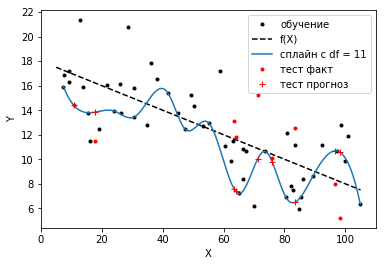

In [11]:
#-----------------------------------------
#-------Сплайн---------

# модель натурального сплайна с заданным количеством узлов (df)
my_df = 11

# равноотстоящие координаты по X
x_train_uni = np.linspace(min(x_train), max(x_train), num=my_df+2)
# находим узлы - ближайшие точки
knots_index = []
for u in x_train_uni:
    min_ind = np.argmin(abs(x_train-u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)

y_train_knots = y_train[knots_index]
x_train_knots = sorted(x_train[knots_index])
# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
## lambda - способ вызова анонимных функций
## Вопрос: как должна быть записана замена lambda: функция sort_x?
## y_sorted_index = sorted(range(len(y_train)), key=sort_y)
y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = y_train_knots[y_train_knots_index]

# строим сглаживающий сплайн
spl = CubicSpline(x_train_knots, y_train_knots)
# делаем прогноз
y_hat_test = spl(x_test)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train_knots), max(x_train_knots), num=300)
y_train_for_plot = spl(x_train_for_plot)
#
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')
plt.show()

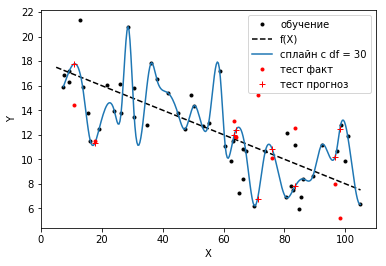

In [12]:
#-----------------------------------------
#-------Сплайн---------

# модель натурального сплайна с заданным количеством узлов (df)
my_df = 30

# равноотстоящие координаты по X
x_train_uni = np.linspace(min(x_train), max(x_train), num=my_df+2)
# находим узлы - ближайшие точки
knots_index = []
for u in x_train_uni:
    min_ind = np.argmin(abs(x_train-u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)

y_train_knots = y_train[knots_index]
x_train_knots = sorted(x_train[knots_index])
# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
## lambda - способ вызова анонимных функций
## Вопрос: как должна быть записана замена lambda: функция sort_x?
## y_sorted_index = sorted(range(len(y_train)), key=sort_y)
y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = y_train_knots[y_train_knots_index]

# строим сглаживающий сплайн
spl = CubicSpline(x_train_knots, y_train_knots)
# делаем прогноз
y_hat_test = spl(x_test)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train_knots), max(x_train_knots), num=300)
y_train_for_plot = spl(x_train_for_plot)
#
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')
plt.show()

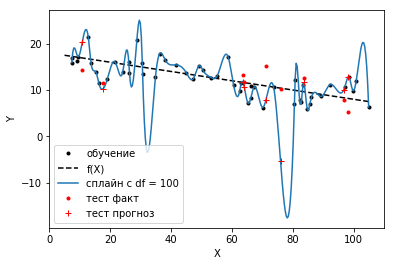

In [13]:
#-----------------------------------------
#-------Сплайн---------

# модель натурального сплайна с заданным количеством узлов (df)
my_df = 100

# равноотстоящие координаты по X
x_train_uni = np.linspace(min(x_train), max(x_train), num=my_df+2)
# находим узлы - ближайшие точки
knots_index = []
for u in x_train_uni:
    min_ind = np.argmin(abs(x_train-u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)

y_train_knots = y_train[knots_index]
x_train_knots = sorted(x_train[knots_index])
# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
## lambda - способ вызова анонимных функций
## Вопрос: как должна быть записана замена lambda: функция sort_x?
## y_sorted_index = sorted(range(len(y_train)), key=sort_y)
y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = y_train_knots[y_train_knots_index]

# строим сглаживающий сплайн
spl = CubicSpline(x_train_knots, y_train_knots)
# делаем прогноз
y_hat_test = spl(x_test)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train_knots), max(x_train_knots), num=300)
y_train_for_plot = spl(x_train_for_plot)
#
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')
plt.show()

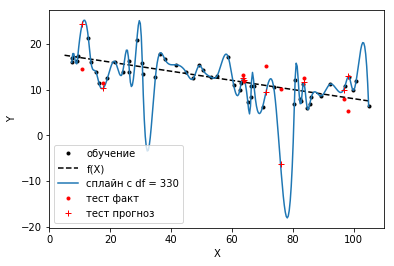

In [14]:
#-----------------------------------------
#-------Сплайн---------

# модель натурального сплайна с заданным количеством узлов (df)
my_df = 330

# равноотстоящие координаты по X
x_train_uni = np.linspace(min(x_train), max(x_train), num=my_df+2)
# находим узлы - ближайшие точки
knots_index = []
for u in x_train_uni:
    min_ind = np.argmin(abs(x_train-u))
    if min_ind not in knots_index:
        knots_index.append(min_ind)

y_train_knots = y_train[knots_index]
x_train_knots = sorted(x_train[knots_index])
# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
## lambda - способ вызова анонимных функций
## Вопрос: как должна быть записана замена lambda: функция sort_x?
## y_sorted_index = sorted(range(len(y_train)), key=sort_y)
y_train_knots_index = sorted(range(len(y_train_knots)), key=lambda k: x_train_knots[k])
y_train_knots = y_train_knots[y_train_knots_index]

# строим сглаживающий сплайн
spl = CubicSpline(x_train_knots, y_train_knots)
# делаем прогноз
y_hat_test = spl(x_test)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train_knots), max(x_train_knots), num=300)
y_train_for_plot = spl(x_train_for_plot)
#
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')
plt.show()

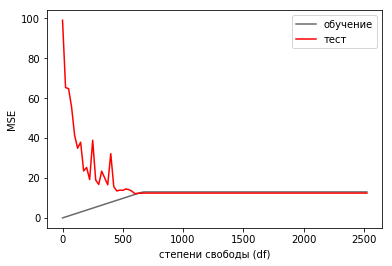

In [15]:
#-----------------------------------------
#  Теперь строим модели с разным сглаживающим фактором
## Вопрос: как отсортировать х и y?
x_train = sorted(x_train)
y_train_index = sorted(range(len(y_train)), key=lambda k: x_train[k])
y_train = y_train[y_train_index]

x_test = sorted(x_test)
y_test_index = sorted(range(len(y_test)), key=lambda k: x_test[k])
y_test = y_test[y_test_index]

s = [i for i in range(0, len(x_train * 50), int(len(x_train) / 2))]
MSE_all = [[0] * 2 for i in range(len(s))]
MSE_all = DataFrame(MSE_all, columns=['MSE_train', 'MSE_test'], index=s)

for s_i in s:
    spl = UnivariateSpline(x_train, y_train, k=3, s=s_i)
    MSE_all.loc[s_i, 'MSE_train'] = sum((y_train - spl(x_train)) ** 2) / len(y_train)
    MSE_all.loc[s_i, 'MSE_test'] = sum((y_test - spl(x_test)) ** 2) / len(y_test)

plt.plot(MSE_all.index, MSE_all['MSE_train'], color='dimgrey',
         marker='', label='обучение')
plt.plot(MSE_all.index, MSE_all['MSE_test'], color='red',
         marker='', label='тест')
#  подписи осей
plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')
# легенда
plt.legend(loc='best')
plt.show()

600


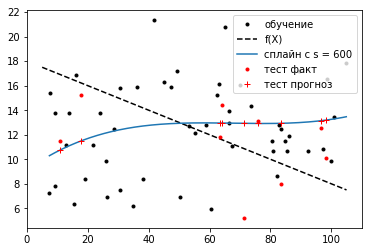

In [16]:
# фильтруем таблицу по минимальной MSE на тестовой выборке
## Вопрос: какие еще операции можно производить над фреймами и каким образом?
s_best = MSE_all[MSE_all['MSE_test'] == min(MSE_all['MSE_test'])].index[0]
print(s_best)
spl = UnivariateSpline(x_train, y_train, k=3, s=s_i)

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
# координаты для прорисовки гладкого графика сплайна
x_train_for_plot = np.linspace(min(x_train), max(x_train), num=300)
y_train_for_plot = spl(x_train_for_plot)
#
## Вопрос: как подставить значение параметра?
plt.plot(x_train_for_plot, y_train_for_plot, marker='', label='сплайн с s = %s' % s_best)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, spl(x_test), color='red', ls='', marker='+', label='тест прогноз')
plt.legend(loc='best')
plt.show()